In [8]:
# 마지막 광물 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

In [9]:
# !git clone https://github.com/taehojo/data.git

In [15]:
df = pd.read_csv('./data/sonar3.csv', header=None)

X=df.iloc[:,0:60]
y=df.iloc[:,60]

k = 5

kf = KFold(n_splits=k, shuffle=True)

acc_score = []

def model_fn():
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #split()에 의해 k개의 학습셋, 테스트셋으로 분리되며 for문에 의해 k번 반복

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train,y_train,epochs=200, batch_size=10, verbose=0)

    accuracy = model.evaluate(x_test,y_test)[1]
    acc_score.append(accuracy)

    acc_score_avg = sum(acc_score) / k 

    print('정확도:', acc_score)
    print('정확도 평균:', acc_score_avg)

2/2 [==============================] - 0s 0s/step - loss: 0.5898 - accuracy: 0.8095
정확도: [0.8095238208770752]
정확도 평균: 0.16190476417541505
2/2 [==============================] - 0s 15ms/step - loss: 0.6861 - accuracy: 0.7381
정확도: [0.8095238208770752, 0.738095223903656]
정확도 평균: 0.30952380895614623
2/2 [==============================] - 0s 0s/step - loss: 0.8777 - accuracy: 0.7857
정확도: [0.8095238208770752, 0.738095223903656, 0.7857142686843872]
정확도 평균: 0.4666666626930237
2/2 [==============================] - 0s 1ms/step - loss: 0.8393 - accuracy: 0.7561
정확도: [0.8095238208770752, 0.738095223903656, 0.7857142686843872, 0.7560975551605225]
정확도 평균: 0.6178861737251282
2/2 [==============================] - 0s 0s/step - loss: 0.2576 - accuracy: 0.8780
정확도: [0.8095238208770752, 0.738095223903656, 0.7857142686843872, 0.7560975551605225, 0.8780487775802612]
정확도 평균: 0.7934959292411804


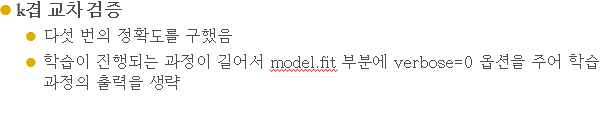

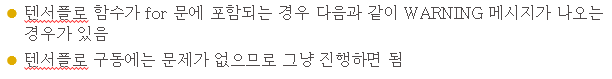